<a href="https://colab.research.google.com/github/Daksh2311/BAAS_RP/blob/main/BAAS_MODEL_TRIAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

excel_file = "/content/drive/MyDrive/BAAS/PricesData.xlsx"
sheet_name = "Sheet1"
df = pd.read_excel(excel_file, sheet_name=sheet_name)
df["Datetime"] = pd.to_datetime(df[["year", "month", "day","hour"]])  #converting into standard date time format
df = df[["Datetime","prices"]]
print(df)

                Datetime   prices
0    2023-01-01 00:00:00  2739.04
1    2023-01-01 01:00:00  2496.47
2    2023-01-01 02:00:00  2434.52
3    2023-01-01 03:00:00  2427.10
4    2023-01-01 04:00:00  2566.50
...                  ...      ...
8755 2023-12-31 19:00:00  4700.17
8756 2023-12-31 20:00:00  3522.82
8757 2023-12-31 21:00:00  3063.15
8758 2023-12-31 22:00:00  2912.73
8759 2023-12-31 23:00:00  3024.28

[8760 rows x 2 columns]


In [ ]:
import pandas as pd
import glob

# Specify the folder path containing your CSV files
folder_path = '/content/drive/MyDrive/test'

# Get all CSV files in the folder
xlsx_files = glob.glob(f"{folder_path}/*.xlsm")

# Create an empty list to store DataFrames
all_dataframes = []

# Loop through each CSV file
for file in xlsx_files:
  # Read the CSV file into a DataFrame
  df = pd.read_excel(file)
  # Append the DataFrame to the list
  all_dataframes.append(df)

# Concatenate all DataFrames into a single DataFrame
combined_df = pd.concat(all_dataframes, ignore_index=True)
combined_df.columns = ["Date", "Hour", "Prices"]

combined_df['Hour'] = [i % 24 for i in range(len(combined_df))]
df = combined_df

for i in range(0, len(df), 24):
    df.iloc[i:i+24, 0] = df.iloc[i, 0]

df.Date = pd.to_datetime(df.Date, format = '%d-%m-%Y')
df['Date'] = pd.to_datetime(df['Date'])
df['Datetime'] = df['Date'] + pd.to_timedelta(df['Hour'], unit='h')

# Drop the 'Date' and 'Hour' columns if you don't need them anymore
df.drop(['Date', 'Hour'], axis=1, inplace=True)

# Sort the dataframe by the 'Datetime' column
df.sort_values(by='Datetime', inplace=True)

# Reset the index if needed
df.reset_index(drop=True, inplace=True)

print(df)

       Prices            Datetime
0     2813.51 2024-01-01 00:00:00
1     2489.37 2024-01-01 01:00:00
2     2349.95 2024-01-01 02:00:00
3     2424.90 2024-01-01 03:00:00
4     2447.48 2024-01-01 04:00:00
...       ...                 ...
2155  4762.26 2024-03-31 19:00:00
2156  4396.63 2024-03-31 20:00:00
2157  4948.62 2024-03-31 21:00:00
2158  5089.98 2024-03-31 22:00:00
2159  5713.19 2024-03-31 23:00:00

[2160 rows x 2 columns]


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

# Load the dataframe
# Assuming df is the dataframe containing the electricity prices data
# Make sure the datetime column is in datetime format
# Replace 'Prices' with the actual column name of electricity prices
df['Datetime'] = pd.to_datetime(df['Datetime'])

# Extract features from datetime
df['hour'] = df['Datetime'].dt.hour
df['day_of_week'] = df['Datetime'].dt.dayofweek
df['month'] = df['Datetime'].dt.month
df['day_of_month'] = df['Datetime'].dt.day
df['week_of_year'] = df['Datetime'].dt.isocalendar().week

# Normalize features if necessary
scaler = StandardScaler()
df[['hour', 'day_of_week', 'month', 'day_of_month', 'week_of_year']] = scaler.fit_transform(df[['hour', 'day_of_week', 'month', 'day_of_month', 'week_of_year']])

# Split dataset into train and test sets
X = df[['hour', 'day_of_week', 'month', 'day_of_month', 'week_of_year']]
y = df['Prices']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model
model = GradientBoostingRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

# Make predictions for the first three months of 2024
# Generate datetime index for 2024
date_range_2024 = pd.date_range(start='2024-01-01', end='2024-03-31', freq='H')
# Extract features for 2024
X_2024 = pd.DataFrame({
    'hour': date_range_2024.hour,
    'day_of_week': date_range_2024.dayofweek,
    'month': date_range_2024.month,
    'day_of_month': date_range_2024.day,
    'week_of_year': date_range_2024.isocalendar().week
})
# Normalize features if necessary
X_2024[['hour', 'day_of_week', 'month', 'day_of_month', 'week_of_year']] = scaler.transform(X_2024[['hour', 'day_of_week', 'month', 'day_of_month', 'week_of_year']])
# Make predictions
predictions_gbr_2024 = model.predict(X_2024)

# Create a dataframe for the predictions
predictions_gbr_df = pd.DataFrame({'Prices': predictions_gbr_2024, 'Datetime': date_range_2024})

print(predictions_gbr_df)

           Prices            Datetime
0     2499.190903 2024-01-01 00:00:00
1     2364.030772 2024-01-01 01:00:00
2     2289.395689 2024-01-01 02:00:00
3     2289.395689 2024-01-01 03:00:00
4     2326.193766 2024-01-01 04:00:00
...           ...                 ...
2156  6568.786602 2024-03-30 20:00:00
2157  6128.673007 2024-03-30 21:00:00
2158  6380.221616 2024-03-30 22:00:00
2159  6834.558133 2024-03-30 23:00:00
2160  7659.289977 2024-03-31 00:00:00

[2161 rows x 2 columns]


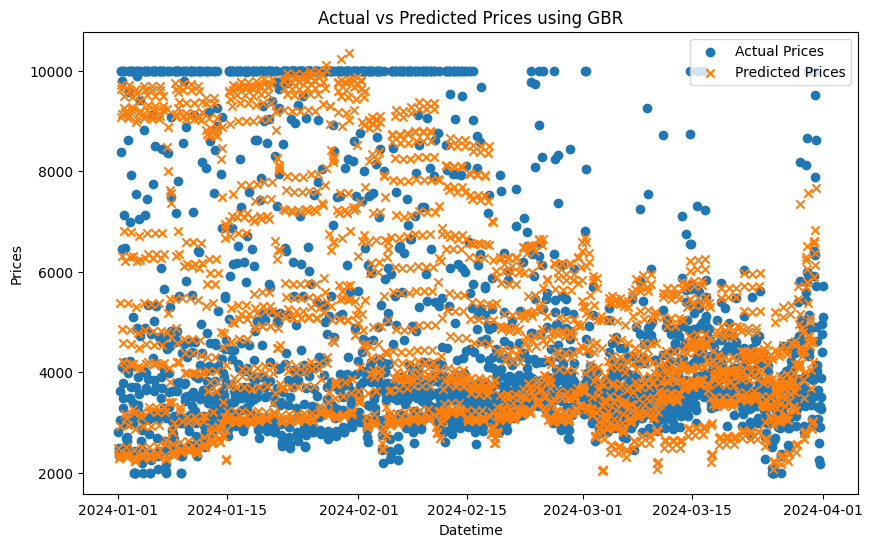

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Datetime'], df['Prices'], label='Actual Prices', marker='o')
plt.scatter(predictions_gbr_df['Datetime'], predictions_gbr_df['Prices'], label='Predicted Prices', marker='x')
plt.title('Actual vs Predicted Prices using GBR')
plt.xlabel('Datetime')
plt.ylabel('Prices')
plt.legend()
plt.show()



In [ ]:
import pandas as pd

# Assuming actual_data and predictions_df are the dataframes containing actual and predicted prices for three months in 2024

# Merge actual and predicted data on Datetime column
merged_df = pd.merge(df, predictions_gbr_df, on='Datetime', suffixes=('_actual', '_predicted'))

# Calculate absolute percentage error for each prediction
merged_df['abs_percentage_error'] = abs((merged_df['Prices_actual'] - merged_df['Prices_predicted']) / merged_df['Prices_actual']) * 100

# Calculate mean absolute percentage error
mape = merged_df['abs_percentage_error'].mean()

# Calculate accuracy percentage
accuracy_percentage = 100 - mape

print("Accuracy Percentage: {:.2f}%".format(accuracy_percentage))

Accuracy Percentage: 87.53%


In [ ]:
import pandas as pd

# Assuming df is the dataframe containing the electricity prices data

# Group by date and calculate maximum and minimum prices
daily_max_min_prices = predictions_gbr_df.groupby(predictions_gbr_df['Datetime'].dt.date).agg({'Prices': ['max', 'min']}).reset_index()

# Flatten multi-index columns
daily_max_min_prices.columns = ['Datetime', 'Max_Price', 'Min_Price']

# Convert the 'Datetime' column to datetime type
daily_max_min_prices['Datetime'] = pd.to_datetime(daily_max_min_prices['Datetime'])
# Calculate the difference between maximum and minimum prices

daily_max_min_prices['Profits per MWh'] = daily_max_min_prices['Max_Price'] - daily_max_min_prices['Min_Price']

print(daily_max_min_prices)

     Datetime    Max_Price    Min_Price  Profits per MWh
0  2024-01-01  9717.418798  2289.395689      7428.023109
1  2024-01-02  9704.505781  2308.720670      7395.785112
2  2024-01-03  9634.023330  2238.238218      7395.785112
3  2024-01-04  9700.969663  2305.184551      7395.785112
4  2024-01-05  9690.782482  2294.997370      7395.785112
..        ...          ...          ...              ...
86 2024-03-27  5341.702553  2229.143867      3112.558686
87 2024-03-28  5709.302958  2413.329682      3295.973276
88 2024-03-29  7350.507847  2664.208105      4686.299741
89 2024-03-30  7559.732499  2859.981080      4699.751418
90 2024-03-31  7659.289977  7659.289977         0.000000

[91 rows x 4 columns]


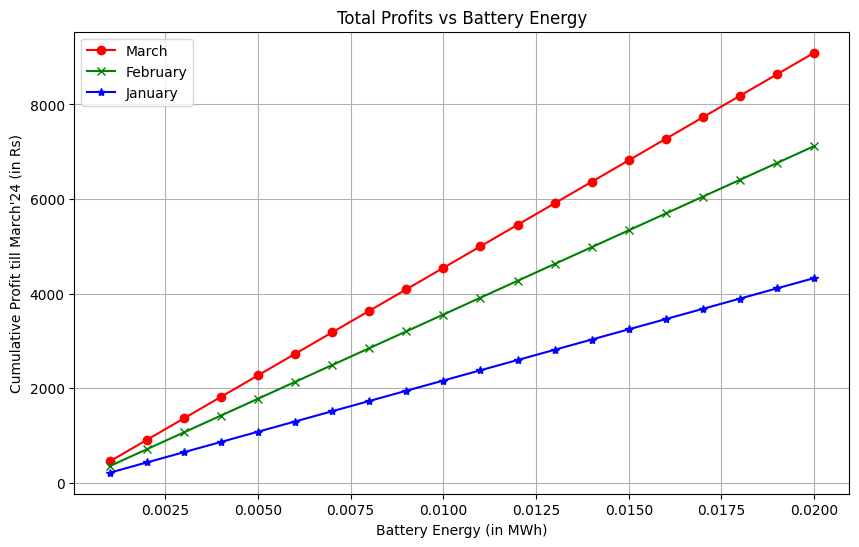

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is the dataframe containing the electricity prices data
# Assuming profit is calculated based on the entire dataframe df and not dependent on battery energy

# Calculate cumulative profits for each month
cumulative_profits = []
months = ['January', 'February', 'March']
for month in months:
    cumulative_profit = daily_max_min_prices[daily_max_min_prices['Datetime'].dt.month_name() == month]['Profits per MWh'].sum()
    cumulative_profits.append(cumulative_profit)


tot = [0, 0, 0]
tot[0] = cumulative_profits[0]
tot[1] = cumulative_profits[0] + cumulative_profits[1]
tot[2] = cumulative_profits[0] + cumulative_profits[1] + cumulative_profits[2]

jan = []
feb = []
mar = []
# Generate battery energy values from 0.001 to 0.020
battery_energy_values = [i * 0.001 for i in range(1, 21)]

# Plot scatter plot
profits = []

for energy in battery_energy_values:
    jan.append(energy*tot[0])
    feb.append(energy*tot[1])
    mar.append(energy*tot[2])




plt.figure(figsize=(10, 6))
plt.plot(battery_energy_values, mar, marker = 'o', color = 'red', label = 'March')
plt.plot(battery_energy_values, feb, marker = 'x', color = 'green', label = 'February')
plt.plot(battery_energy_values, jan, marker = '*', color = 'blue', label = 'January')

plt.title('Total Profits vs Battery Energy')
plt.xlabel('Battery Energy (in MWh)')
plt.ylabel('Cumulative Profit till March\'24 (in Rs)')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')